In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import imageio
import glob

https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a

https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d

T SNE



In [3]:
df = pd.read_csv('data/fashion_data/styles.csv', error_bad_lines=False)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [4]:
df.set_index('id', inplace=True)

In [5]:
# from os import listdir
# from os.path import isfile, join
# pic_files = [f for f in listdir('data/fashion-product-images-small/images') if isfile(join('data/fashion-product-images-small/images', f))]

In [6]:
# pic_files

In [24]:
path = r'/Users/Kelly/galvanize/week8/data/fashion_data/images'
files = glob.glob(path + "/*.jpg")
file_series = pd.Series(files, dtype=object)
idx_series = file_series.str.replace('/Users/Kelly/galvanize/week8/data/fashion_data/images/', '')

In [23]:
z

['Clothing EDA.ipynb',
 '__pycache__',
 'README.md',
 'clothing_df.py',
 'Clustering Tests.ipynb',
 'data']

In [8]:
pic_arr = np.array(files)

In [9]:
def get_pixels(files):
    r = np.zeros((len(files),14400))
    bad_list = []
    for i in range(len(files)):
        img = imageio.imread(files[i])
        flat = np.array(img).flatten()
        if len(flat) == 14400:   
            r[i,:] = flat  
#        else: 
#            bad_list.append(files[i])
    return r

In [10]:
images_arr = get_pixels(pic_arr)

In [11]:
pic_df0 = pd.DataFrame(images_arr, index=idx_series.astype(int), dtype='int')

In [12]:
pic_df = pic_df0[pic_df0.notnull]

In [25]:
pic_idx = set(pic_df.index)
df_idx = set(df.index)

In [26]:
df = df[df.index.isin(pic_idx)]
pic_df = pic_df[pic_df.index.isin(df_idx)]

In [92]:
pic_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14390,14391,14392,14393,14394,14395,14396,14397,14398,14399
9733,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
14147,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
52112,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
6400,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
34297,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [41]:
xx = np.array(pic_df.iloc[0,:].astype(int))
tt = xx.reshape(80, 60, 3)
# tt.shape

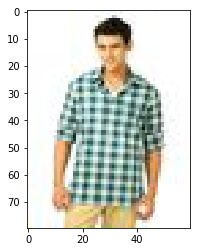

In [42]:
plt.imshow(tt)

In [78]:
df.columns

Index(['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour',
       'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')

In [79]:
df.head()

,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
id,,,,,,,,,
15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [117]:
df['masterCategory'].value_counts()

Apparel           21392
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64

In [103]:
df['gender'].value_counts()

Men       22142
Women     18631
Unisex     2161
Boys        830
Girls       655
Name: gender, dtype: int64

In [116]:
df[df['masterCategory']=='Apparel'].groupby('subCategory').count()

,gender,masterCategory,articleType,baseColour,season,year,usage,productDisplayName
subCategory,,,,,,,,
Apparel Set,106,106,106,106,106,106,106,106
Bottomwear,2693,2693,2693,2687,2693,2693,2691,2693
Dress,478,478,478,478,478,478,478,478
Innerwear,1808,1808,1808,1808,1808,1808,1806,1808
Loungewear and Nightwear,470,470,470,470,470,470,464,470
Saree,427,427,427,427,427,427,427,427
Socks,12,12,12,12,12,12,12,12
Topwear,15398,15398,15398,15398,15397,15397,15384,15398


In [124]:
df[df['masterCategory']=='Accessories'].groupby('subCategory').count()

,gender,masterCategory,articleType,baseColour,season,year,usage,productDisplayName
subCategory,,,,,,,,
Accessories,129,129,129,129,129,129,129,129
Bags,3055,3055,3055,3055,3055,3055,3055,3053
Belts,811,811,811,811,811,811,811,811
Cufflinks,108,108,108,108,108,108,108,108
Eyewear,1073,1073,1073,1073,1073,1073,1073,1073
Gloves,20,20,20,20,20,20,20,20
Headwear,293,293,293,293,293,293,293,293
Jewellery,1079,1079,1079,1079,1079,1079,1079,1079
Mufflers,38,38,38,38,38,38,38,38


In [136]:
df[df['masterCategory']=='Footwear'].groupby('subCategory').count()

,gender,masterCategory,articleType,baseColour,season,year,usage,productDisplayName
subCategory,,,,,,,,
Flip Flops,913,913,913,913,913,913,913,913
Sandal,963,963,963,963,963,963,961,963
Shoes,7343,7343,7343,7343,7323,7343,7343,7343


In [27]:
wearable_list = ['Apparel', 'Accessories', 'Footwear']

In [28]:
wearable_df = df[df['masterCategory'].isin(wearable_list)]

In [29]:
wear_idx = list(wearable_df.index)
wear_pics = pic_df[pic_df.index.isin(wear_idx)]

In [93]:
wear_pics

,0,1,2,3,4,5,6,7,8,9,...,14390,14391,14392,14393,14394,14395,14396,14397,14398,14399
9733,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
14147,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
52112,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
6400,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
34297,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
24084,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
12536,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
54563,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
15259,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
35189,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [30]:
set(wear_pics.index) == set(wearable_df.index)

True

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [48]:
clust = AgglomerativeClustering(n_clusters=3).fit(wear_pics[0:1000])

In [49]:
clust

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [50]:
cc = clust.labels_

In [76]:
aa = wear_pics[0:1000].index
bb = wearable_df.loc[aa,:]
bb

,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
9733,Men,Apparel,Topwear,Shirts,Green,Fall,2011.0,Casual,Indian Terrain Men Chase Green Shirts
14147,Men,Accessories,Cufflinks,Cufflinks,Steel,Fall,2011.0,Formal,Belmonte Men Bright Assorted Steel Cufflinks
52112,Women,Apparel,Topwear,Kurtis,Multi,Summer,2012.0,Ethnic,Myntra Women Multi Coloured Kurti
6400,Men,Footwear,Sandal,Sandals,Black,Summer,2011.0,Casual,Lotto Men Laos Black Grey Floater
34297,Women,Apparel,Topwear,Dupatta,Gold,Summer,2012.0,Ethnic,Fabindia Women Gold Tussar Dupatta
24084,Women,Footwear,Shoes,Heels,Bronze,Winter,2015.0,Casual,Catwalk Women Bronze Flats
12536,Women,Apparel,Topwear,Sweatshirts,Black,Fall,2011.0,Casual,Puma Women Solid Black Sweatshirts
54563,Women,Apparel,Topwear,Tunics,White,Summer,2012.0,Casual,Global Desi Women White Printed Tunic
15259,Women,Footwear,Shoes,Casual Shoes,White,Fall,2011.0,Casual,ADIDAS Originals Women Top Ten low Sleek White...
35189,Unisex,Accessories,Bags,Backpacks,Red,Summer,2015.0,Casual,Wildcraft Unisex Red Solid Backpack


In [80]:
bb['category_group'] = bb['masterCategory'].apply(lambda x: 0 if x =='Apparel' else (1 if x=='Accessories' else 2))
bb['cluster_group'] = cc
dd = bb[['category_group', 'cluster_group']]

In [82]:
dd[dd['category_group']==0].groupby('cluster_group').count()

,category_group
cluster_group,
0,425
1,70
2,2


In [83]:
dd[dd['category_group']==1].groupby('cluster_group').count()

,category_group
cluster_group,
0,70
1,195
2,6


In [84]:
dd[dd['category_group']==2].groupby('cluster_group').count()

,category_group
cluster_group,
0,6
1,224
2,2


In [85]:
clust2 = AgglomerativeClustering(n_clusters=2).fit(wear_pics[0:1000])

In [86]:
aa2 = wear_pics[0:1000].index
bb2 = wearable_df.loc[aa2,:]
cc2 = clust2.labels_

In [88]:
bb2['category_group'] = bb2['masterCategory'].apply(lambda x: 0 if x =='Apparel' else 1)
bb2['cluster_group'] = cc2
dd2 = bb2[['category_group', 'cluster_group']]

In [89]:
dd2[dd2['category_group']==0].groupby('cluster_group').count()

,category_group
cluster_group,
0,427
1,70


In [90]:
dd2[dd2['category_group']==1].groupby('cluster_group').count()

,category_group
cluster_group,
0,84
1,419


In [94]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
#from scipy.spatial.distance import dist

ImportError: cannot import name 'dist' from 'scipy.spatial.distance' (/Users/Kelly/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py)

In [97]:
Z = linkage(wear_pics[0:1000], 'ward')

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [65.0, 65.0, 75.0, 75.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [70.0, 70.0, 93.75, 93.75],
  [55.0, 55.0, 81.875, 81.875],
  [14.375, 14.375, 68.4375, 68.4375]],
 'dcoord': [[0.0, 30167.219847247703, 30167.219847247703, 0.0],
  [0.0, 47209.31021772339, 47209.31021772339, 30167.219847247703],
  [0.0, 61295.954989319616, 61295.954989319616, 47209.31021772339],
  [0.0, 71343.10610470542, 71343.10610470542, 61295.954989319616],
  [0.0, 37442.19732442614, 37442.19732442614, 0.0],
  [0.0, 47060.6801888874, 47060.6801888874, 0.0],
  [0.0, 47950.78603675707, 47950.78603675707, 47060.6801888874],
  [0.0, 64122.37986352373, 64122.37986352373, 47950.78603675707],
  [37442.19732442614, 72839.30749938753, 72839.30749938753, 64122.37986352373],
  [0.0, 105048.78096604267, 105048.78096604267, 72839.30749938753],
  [71343.1

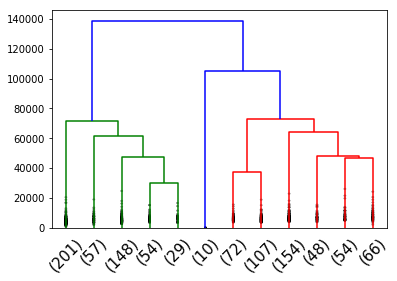

In [102]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)
#plt.show(figsize=(8,8))